In [1]:
import re
import pickle
import os
import collections

from wordcloud import WordCloud
from konlpy.tag import Okt
from collections import Counter

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

plt.rc('font', family='AppleGothic') 

In [12]:
df=pd.read_csv('preprocessed_data/news_data.csv',index_col=0)
df.index=pd.to_datetime(df.index,format="%Y-%m-%d")

# 코리아헤럴드만 제거됨 (영어)
df.dropna(inplace=True)

# column 순서 변경
df=df.loc[:,['news_brand','news_title_raw','news_title_cleaned','news_words']]


In [17]:
df['news_brand'].value_counts().to_dict()

{'중앙일보': 2475,
 '한국경제': 2455,
 'JTBC': 2335,
 'YTN': 2225,
 '매일경제': 2220,
 '조선일보': 2000,
 'SBS': 1950,
 '연합뉴스': 1825,
 'KBS': 1690,
 '국민일보': 1620,
 '한겨레': 1600,
 'MBC': 1585,
 '서울경제': 1525,
 '아시아경제': 1505,
 '헤럴드경제': 1430,
 '동아일보': 1375,
 '조선비즈': 1180,
 '머니투데이': 1170,
 '한국일보': 1140,
 '이데일리': 1135,
 '경향신문': 1085,
 '뉴스1': 870,
 '서울신문': 800,
 '연합뉴스TV': 755,
 '한국경제TV': 730,
 'MBN': 610,
 '파이낸셜뉴스': 595,
 '뉴시스': 530,
 '세계일보': 490,
 '오마이뉴스': 445,
 '노컷뉴스': 400,
 '채널A': 335,
 '부산일보': 310,
 '디지털타임스': 305,
 'TV조선': 300,
 '문화일보': 245,
 '미디어오늘': 240,
 '전자신문': 225,
 '매일신문': 210,
 'SBS Biz': 195,
 '프레시안': 175,
 '블로터': 160,
 '데일리안': 160,
 '강원일보': 155,
 'ZDNet Korea': 150,
 '아이뉴스24': 140,
 '시사저널': 90,
 '뉴스타파': 67,
 '더팩트': 60,
 '디지털데일리': 60,
 '매경이코노미': 55,
 '비즈니스워치': 50,
 '한겨레21': 45,
 '시사IN': 40,
 '헬스조선': 25,
 '신동아': 25,
 '주간조선': 20,
 '월간 산': 20,
 '머니S': 20,
 '동아사이언스': 15,
 '조세일보': 15,
 '일다': 15,
 '대구MBC': 10,
 '여성신문': 10,
 '이코노미스트': 10,
 '주간경향': 10,
 '코메디닷컴': 10,
 '한경비즈니스': 10,
 '전주MBC': 5,
 '주간동아': 5}

In [20]:
tags = df['news_brand'].value_counts().to_dict()
x, y = np.ogrid[:300, :400]
mask = (x - 150) ** 2 + 0.3*(y - 200) ** 2 > 100 ** 2
mask = 255 * mask.astype(int)

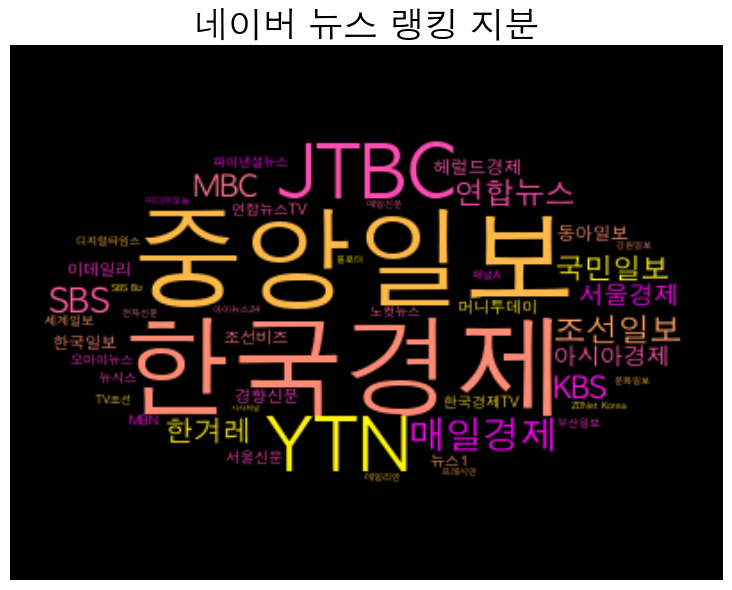

In [21]:
wc = WordCloud(background_color="black",
               repeat=False,
               mask=mask, 
            #    min_font_size=10,
               prefer_horizontal=True,
               colormap = 'spring',
               font_path="/System/Library/Fonts/Supplemental/AppleGothic.ttf")


wc.generate_from_frequencies(tags)
plt.figure(figsize=(12,6),dpi=100)
plt.axis("off")
plt.imshow(wc, interpolation="bilinear")
plt.title("네이버 뉴스 랭킹 지분",fontsize=25,fontweight='bold')
plt.tight_layout()
plt.show()